In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numba import njit, prange
from joblib import Parallel, delayed
import itertools as it
from pynamicalsys import DiscreteDynamicalSystem as dds, PlotStyler
from pynamicalsys import BasinMetrics

In [ ]:
grid_size = 10000
x_range = (0, 1, grid_size)
y_range = (0, 1, grid_size)
x = np.linspace(*x_range)
y = np.linspace(*y_range)
X, Y = np.meshgrid(x, y, indexing='ij')
obj = [[0.2, 0.6],
       [0.2, 0.6]]
mask = (X >= obj[0][0]) & (X <= obj[0][1]) & (Y >= obj[1][0]) & (Y <= obj[1][1])

basin = np.zeros((grid_size, grid_size), dtype=int)
basin[mask] = 1

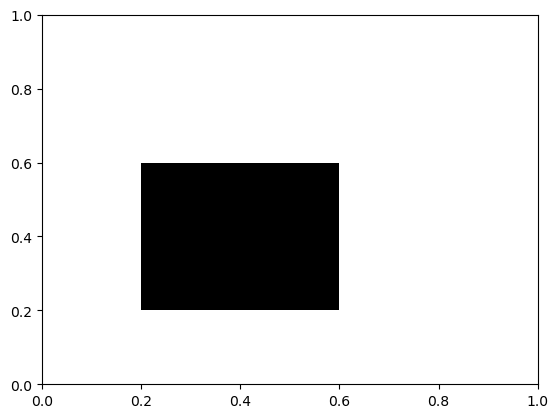

In [22]:
plt.pcolormesh(X, Y, basin, cmap="Greys")

In [15]:
bm = BasinMetrics(basin)
eps, f = bm.uncertainty_fraction(X, Y, epsilon_max=0.1)

In [16]:
coeffs, cov = np.polyfit(np.log10(eps), np.log10(f), 1, cov=True)

In [17]:
coeffs, np.sqrt(np.diag(cov))

(array([1.03178123, 0.60086196]), array([0.00420519, 0.01113781]))

In [18]:
feps = lambda x, coeffs: (10 ** coeffs[1]) * (x ** coeffs[0])

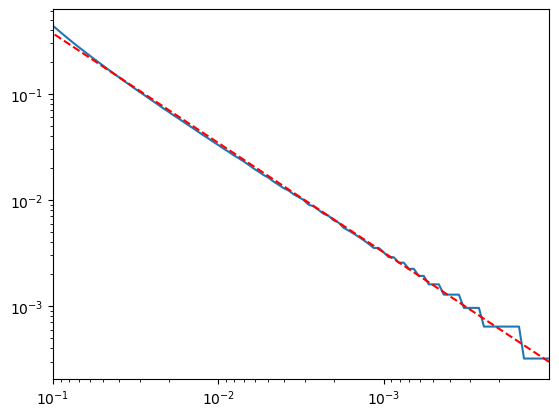

In [19]:
plt.plot(eps, f)
plt.plot(eps, feps(eps, coeffs), 'r--', label='fit')
plt.xlim(eps.max(), eps.min())
plt.xscale('log')
plt.yscale('log')